## Uber Data Analysis

### Introduction:
- Uber is a multinational transportation network company that operates through a mobile app, connecting passengers with drivers for on-demand rides. With a vast network of drivers and a user-friendly interface, Uber offers a convenient and reliable transportation service worldwide. Uber car refers to a vehicle that is used by drivers who are registered with the Uber platform to provide transportation services to passengers.

### Objective:
- Uber data analysis involues vast sets of rides and passenger Preferences to optimize service efficiency and enhance customer experiences through stastical methods.Uber data entails routes, demand patterns and Passenger Preferences to make informed decisions to improve operations, services and innovate within the evolving transportation landscape.

### Data Description:
- Start_Date: Indicate the Start Date/time of the ride
- End_Date: Indicate the End Date/time of the ride
- Category: The type of ride requested by the passenger
- Start: Pickup location.
- Stop: Dropoff location.
- Miles: Distance traveled during the ride in miles.
- Purpose: Passenger's reason for the ride.ns

### The Work Flow:

- Import Libraries
- Load the data
- Data Processing
- Summary Statistics
- Exploratory Data Analysis (EDA)
- Key Findings and 
- Data Visualization and interpretation
- Recommendations and Conclusions
- Limitations.

In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
# Load the data

df = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\UberDataset.csv")
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Data Processing

In [3]:
# Data inspection

df.shape

(1156, 7)

In [4]:
# Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
# checking for missing values

df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Observations

- After loading the data,
-  we have 1156 rows and 7 columns in the data
-  There are missing values that needs cleaning and improve the integrity of the findings we get.
-  The missing value gotten from The Purpose field might be, because the passengers didnt input the reason for the trip so we going to drop it.

In [4]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

- Missing value Gone, Confrimed. 

In [8]:
# Summary of the data

df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [9]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


There is duplicate input so i am going to drop it

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [7]:
# Converting dtype as datetime 

df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [8]:
# Create new features for better analysis and accuracy

df["year"] = df['START_DATE'].dt.year
df['DAY_NAME'] = df['START_DATE'].dt.day_name()

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['TIME_LABEL'] = pd.cut(df['START_DATE'].dt.hour, bins=time_periods, labels=labels, right=False)

df["MONTH"] = df['START_DATE'].dt.month_name()

df['DURATION'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

In [9]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,DAY_NAME,TIME_LABEL,MONTH,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,2016,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,Wednesday,Afternoon,January,67.0


### Interpretation:
- I created new features for better analysis and accuracy.
- Year: Shows the year,
- DAY_NAME: indicate each day of the ride,
- TIME_LABEL: Shows the timeframe of the ride and
- DURATION: Time recorded for the trip.

## Key Findings:


In [20]:

unique_purposes = df['CATEGORY'].dropna().unique()
mileage_by_purpose = df.groupby('CATEGORY')['MILES'].sum()

print(mileage_by_purpose)

CATEGORY
Business    11477.1
Personal      717.7
Name: MILES, dtype: float64


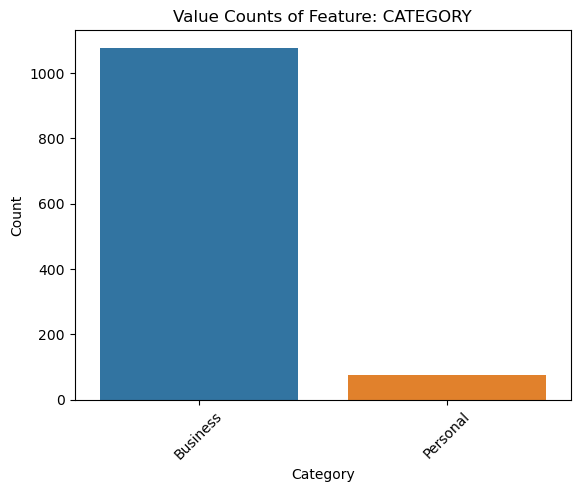

In [37]:
# Visualization
sns.countplot(x=df["CATEGORY"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()   

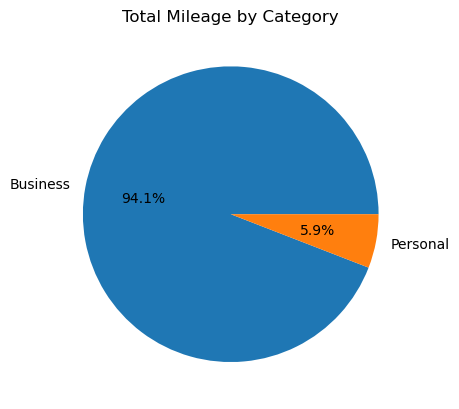

In [21]:
mileage_by_category = df.groupby('CATEGORY')['MILES'].sum()

plt.pie(mileage_by_category, labels=mileage_by_category.index, autopct='%1.1f%%')
plt.title('Total Mileage by Category')
plt.show()

Text(0.5, 1.0, 'Outliers in Duration')

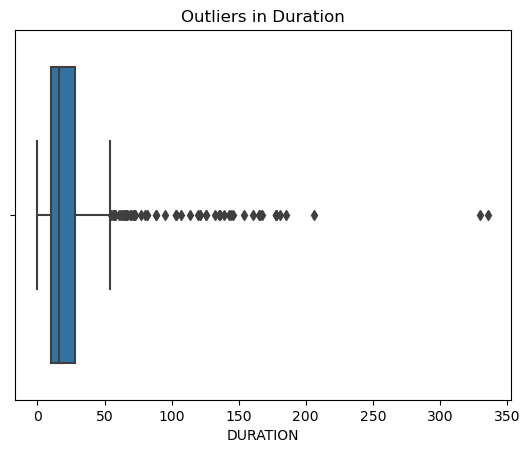

In [35]:
sns.boxplot(x=df["DURATION"],data=df)
plt.title("Outliers in Duration")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

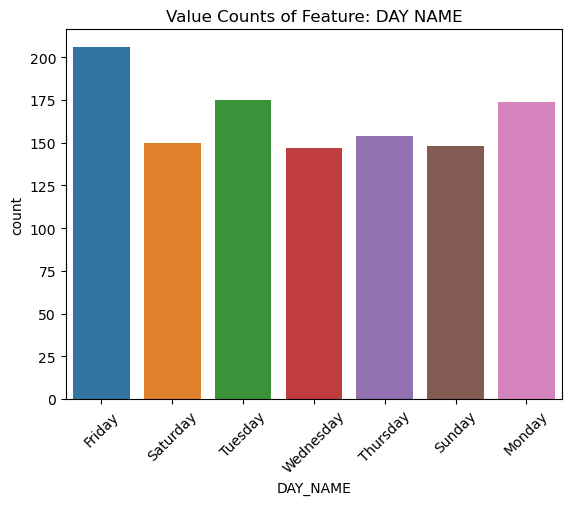

In [21]:
sns.countplot(x=df["DAY_NAME"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)

In [24]:
unique_time = df['TIME_LABEL'].dropna().unique()
mileage_by_purpose = df.groupby('TIME_LABEL')['MILES'].sum()

print(mileage_by_purpose)

TIME_LABEL
Night         400.7
Morning      1999.1
Afternoon    6325.0
Evening      3470.0
Name: MILES, dtype: float64


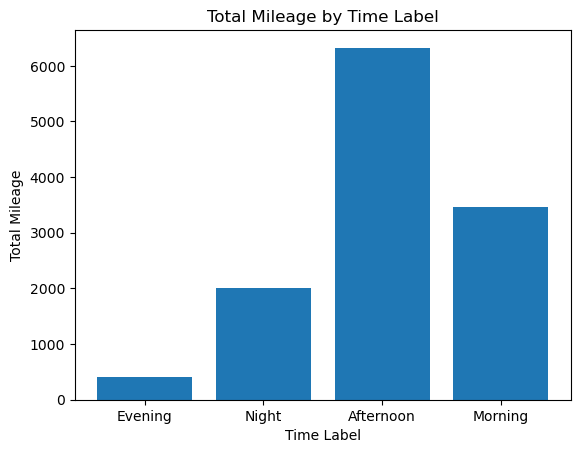

In [25]:

plt.bar(unique_time, mileage_by_purpose)
plt.xlabel('Time Label')
plt.ylabel('Total Mileage')
plt.title('Total Mileage by Time Label')
plt.show()

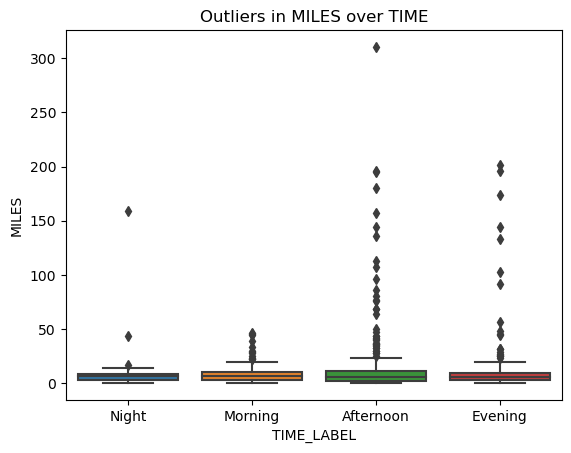

In [34]:
sns.boxplot(x=df["TIME_LABEL"], y=df["MILES"])
plt.title("Outliers in MILES over TIME")
plt.show()

In [17]:
unique_purposes = df['PURPOSE'].dropna().unique()
mileage_by_purpose = df.groupby('PURPOSE')['MILES'].sum()

print(mileage_by_purpose)

PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2841.4
Missing            4893.5
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64


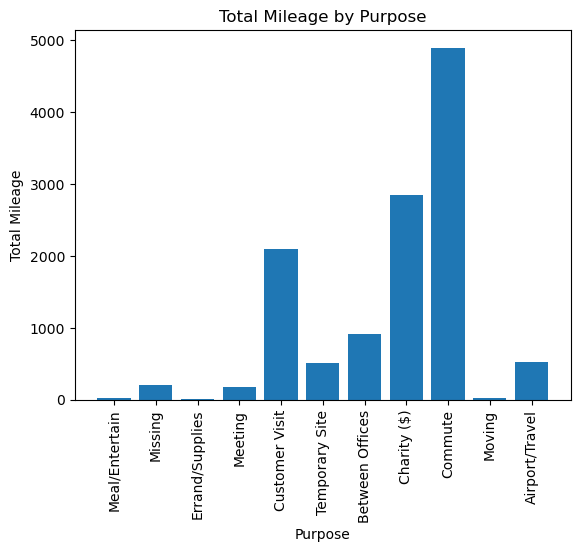

In [36]:
unique_purposes = df['PURPOSE'].dropna().unique()
mileage_by_purpose = df.groupby('PURPOSE')['MILES'].sum()

plt.bar(unique_purposes, mileage_by_purpose)
plt.xlabel('Purpose')
plt.ylabel('Total Mileage')
plt.title('Total Mileage by Purpose')
plt.xticks(rotation=90)
plt.show()

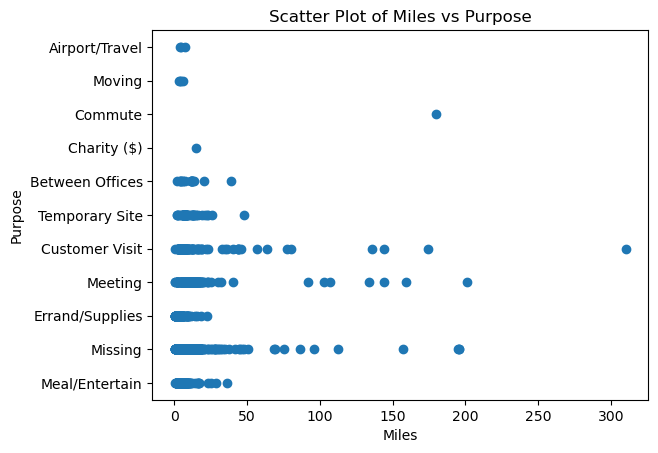

In [18]:
plt.scatter(df['MILES'], df['PURPOSE'])
plt.xlabel('Miles')
plt.ylabel('Purpose')
plt.title('Scatter Plot of Miles vs Purpose')
plt.show()

In [27]:
start_destination = df['START'].dropna()
unique_destinations = start_destination.unique()
print(unique_destinations)

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'Latta' 'Jacksonville'

In [28]:
len(unique_destinations)

177

In [31]:
start_destination = df['START'].dropna()
destination_counts = start_destination.value_counts().head(20)
print(destination_counts)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
New Orleans          10
Emeryville           10
Downtown              9
Edgehill Farms        8
Name: START, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

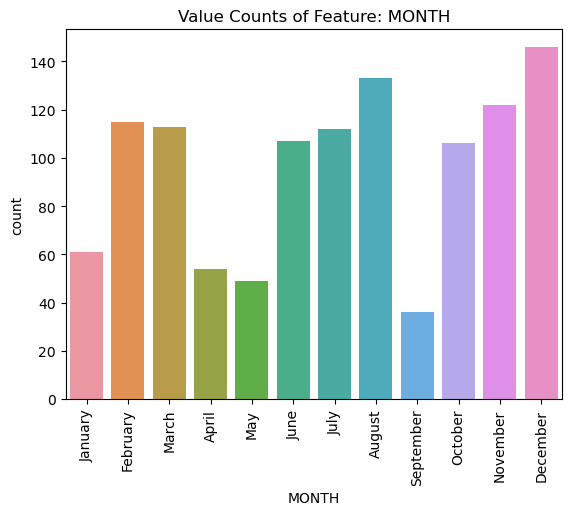

In [32]:
sns.countplot(x=df["MONTH"])
plt.title("Value Counts of Feature: MONTH")
plt.xticks(rotation=90)

## Conclusion:

In summary, analyzing and visualizing Uber data can provide valuable insights into user behavior, popular destinations, time-specific demand patterns, and potential areas for improvement. By examining the total number of occurrences for each destination, mileage distribution across different time labels, and analyzing mileage based on start and end locations, Uber can optimize driver availability and allocate resources efficiently. Identifying and investigating outliers and anomalies in mileage can help ensure data accuracy and integrity. Overall, combining data analysis and visualization techniques can inform strategic decision-making, enhance operational efficiency, and improve the overall user experience.rience.or Uber.

## Recommendations:

Utilize the insights gained from analyzing popular destinations and time-specific demand patterns to implement targeted marketing campaigns or promotional offers to attract more users and increase ridership in specific areas or during specific time periods.
Optimize driver allocation by strategically assigning drivers to areas with high demand based on the analysis of mileage by start and end locations. This can help reduce wait times for users and improve overall service quality.
Continuously monitor and analyze outliers and anomalies in mileage to identify potential issues or errors in data recording. Implement measures to ensure data accuracy and integrity for more reliable analysis and decision-making.

## Limitations:

The analysis is based on the available data, and any limitations or biases present in the data can affect the accuracy of the insights and recommendations.
The analysis focuses on quantitative data, and qualitative factors such as user preferences or feedback are not considered, which may provide additional insights.
The analysis assumes that the recorded mileage accurately represents the actual distance traveled, but factors such as traffic conditions or detours may affect the accuracy of the recorded mileage.
The analysis is limited to the provided dataset and may not capture the entire user base or all relevant factors influencing user behavior.
The recommendations provided are based on the analyzed data but may require further validation or testing before implementation to ensure their effectiveness in real-world scenarios.